In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from time import perf_counter, sleep
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()

pd.set_option('display.max_rows', 90)

#### Task 1

Этот набор данных посвящен прогнозированию финансовой несостоятельности для выборки компаний.

Company представляет выборку компаний.
Время показывает различные периоды времени, к которым относятся данные. Длина временных рядов варьируется от 1 до 14 для каждой компании.
Целевая переменная обозначается как "финансовая несостоятельность", если оно больше -0,50, компания должна рассматриваться как финансово здоровая (0). В противном случае это было бы расценено как банскроство (1).
Характеристики, обозначенные от x1 до x83, представляют собой некоторые финансовые и нефинансовые характеристики отобранных компаний. Эти характеристики относятся к предыдущему периоду времени, который следует использовать для прогнозирования того, будет ли компания испытывать финансовые трудности или нет (классификация). Фактор x80 - это категориальная переменная.

Например, компания 1 испытывает финансовые трудности в момент 4, но компания 2 все еще здорова в момент 14.

#### Task 2

In [ ]:
df = pd.read_csv('Financial Distress.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

#### Task 3

In [ ]:
df.head(10)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.28100,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.27000,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.05290,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.11310,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.06230,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
5,2,2,0.007188,1.05580,0.081916,0.87949,0.68673,0.142630,0.043102,0.77198,...,107.090,31.31,30.194,17.000,16.0,0.4,29,1.357300,8,28
6,2,3,1.200200,0.97059,0.076064,0.90677,0.80980,0.165920,-0.024649,0.73660,...,120.870,36.07,35.273,17.000,15.0,-0.2,29,0.007188,9,29
7,2,4,2.234800,1.05900,0.130200,0.81811,0.87599,0.234450,0.045576,0.78727,...,54.806,39.80,38.377,17.167,16.0,5.6,29,1.200200,10,30
8,2,5,1.340500,1.12450,0.147840,0.75871,1.07990,0.276440,0.089408,0.80356,...,59.806,44.53,42.822,15.500,14.0,2.1,29,2.234800,11,31
9,2,6,2.047400,1.59980,0.262460,0.54615,1.31270,0.369480,0.296640,0.85364,...,66.262,52.74,49.206,15.500,12.0,-6.4,29,1.340500,12,32


In [ ]:
df.tail()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
3667,422,10,0.43802,2.2605,0.20289,0.16037,0.18588,0.17597,0.19840,2.2236,...,100.0,100.0,100.0,17.125,14.5,-7.0,37,0.43638,4,41
3668,422,11,0.48241,1.9615,0.21644,0.20095,0.21642,0.20359,0.18987,1.9382,...,91.5,130.5,132.4,20.000,14.5,-16.0,37,0.43802,5,42
3669,422,12,0.50077,1.7099,0.20797,0.26136,0.21399,0.19367,0.18389,1.6898,...,87.1,175.9,178.1,20.000,14.5,-20.2,37,0.48241,6,43
3670,422,13,0.61103,1.5590,0.18545,0.30728,0.19307,0.17214,0.17068,1.5389,...,92.9,203.2,204.5,22.000,22.0,6.4,37,0.50077,7,44
3671,422,14,0.51865,1.6148,0.17676,0.36369,0.18442,0.16955,0.19786,1.5842,...,91.7,227.5,214.5,21.000,20.5,8.6,37,0.61103,8,45


In [ ]:
pd.concat([df.head(10), df.tail()], axis = 0)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.28100,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.27000,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.05290,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.11310,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.06230,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
5,2,2,0.007188,1.05580,0.081916,0.87949,0.68673,0.142630,0.043102,0.77198,...,107.090,31.31,30.194,17.000,16.0,0.4,29,1.357300,8,28
6,2,3,1.200200,0.97059,0.076064,0.90677,0.80980,0.165920,-0.024649,0.73660,...,120.870,36.07,35.273,17.000,15.0,-0.2,29,0.007188,9,29
7,2,4,2.234800,1.05900,0.130200,0.81811,0.87599,0.234450,0.045576,0.78727,...,54.806,39.80,38.377,17.167,16.0,5.6,29,1.200200,10,30
8,2,5,1.340500,1.12450,0.147840,0.75871,1.07990,0.276440,0.089408,0.80356,...,59.806,44.53,42.822,15.500,14.0,2.1,29,2.234800,11,31
9,2,6,2.047400,1.59980,0.262460,0.54615,1.31270,0.369480,0.296640,0.85364,...,66.262,52.74,49.206,15.500,12.0,-6.4,29,1.340500,12,32


#### Task 4

In [ ]:
# вычислим средние значения по столбикам
df.mean()

Company                  182.084423
Time                       7.528322
Financial Distress         1.040257
x1                         1.387820
x2                         0.129706
x3                         0.615769
x4                         0.868160
x5                         0.154949
x6                         0.106717
x7                         0.784031
x8                        39.274361
x9                         0.332610
x10                        0.136263
x11                        0.638835
x12                   125273.032252
x13                        0.384230
x14                        2.438322
x15                     8185.968999
x16                      -25.039036
x17                     2058.577101
x18                        0.041380
x19                       77.549137
x20                        0.103999
x21                        1.449663
x22                       14.195065
x23                        0.273236
x24                        0.532118
x25                      996

In [ ]:
# пропуски в данном датасете отсутсвуют
df.isna().sum().sum()

0

#### Task 5

In [ ]:
# так как признаков очень много, отберем 6 для анализа (3 интервальных и 3 дискретных)

features = [
    'x1', 'x2', 'x5', # интервальные
    'x80', 'x82', 'x83' # дискретные
]

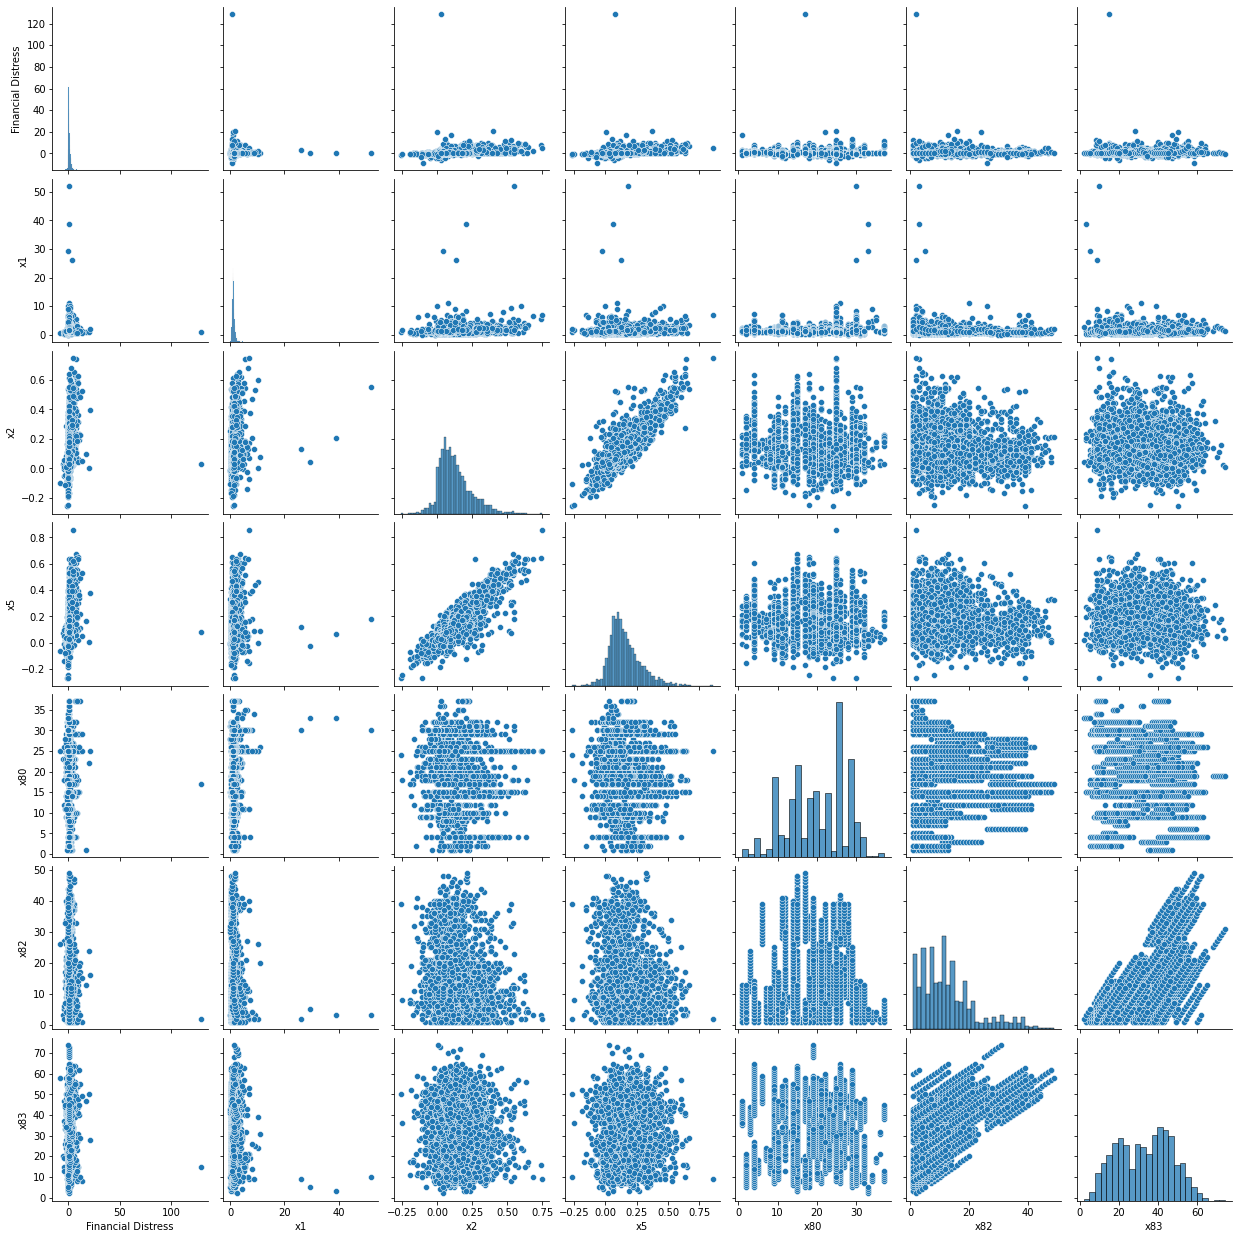

In [ ]:
sns.pairplot(df[['Financial Distress'] + features])

<AxesSubplot: >

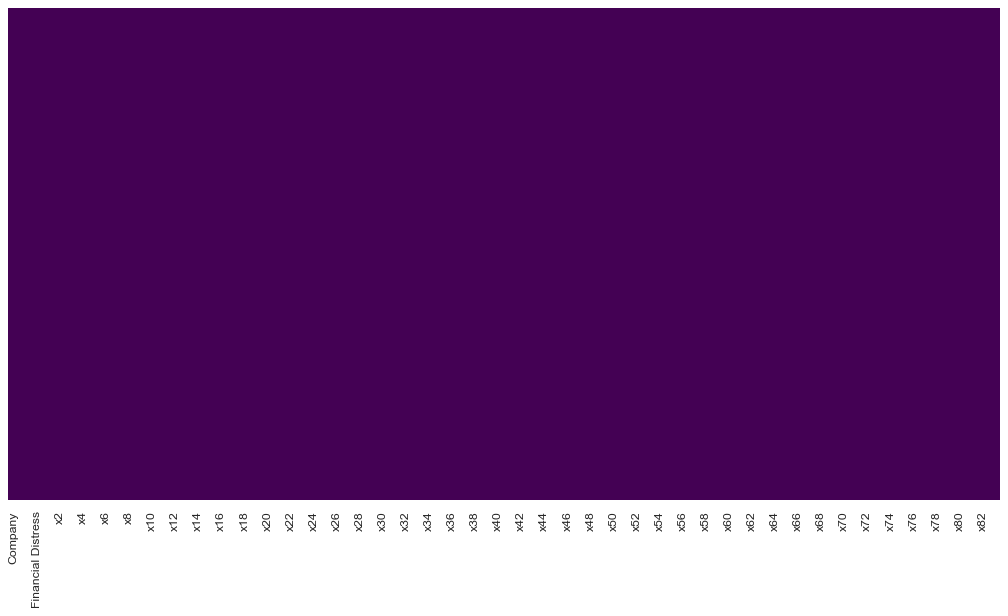

In [ ]:
#отсутствующие значени
figure(figsize=(16, 8), dpi=80)

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

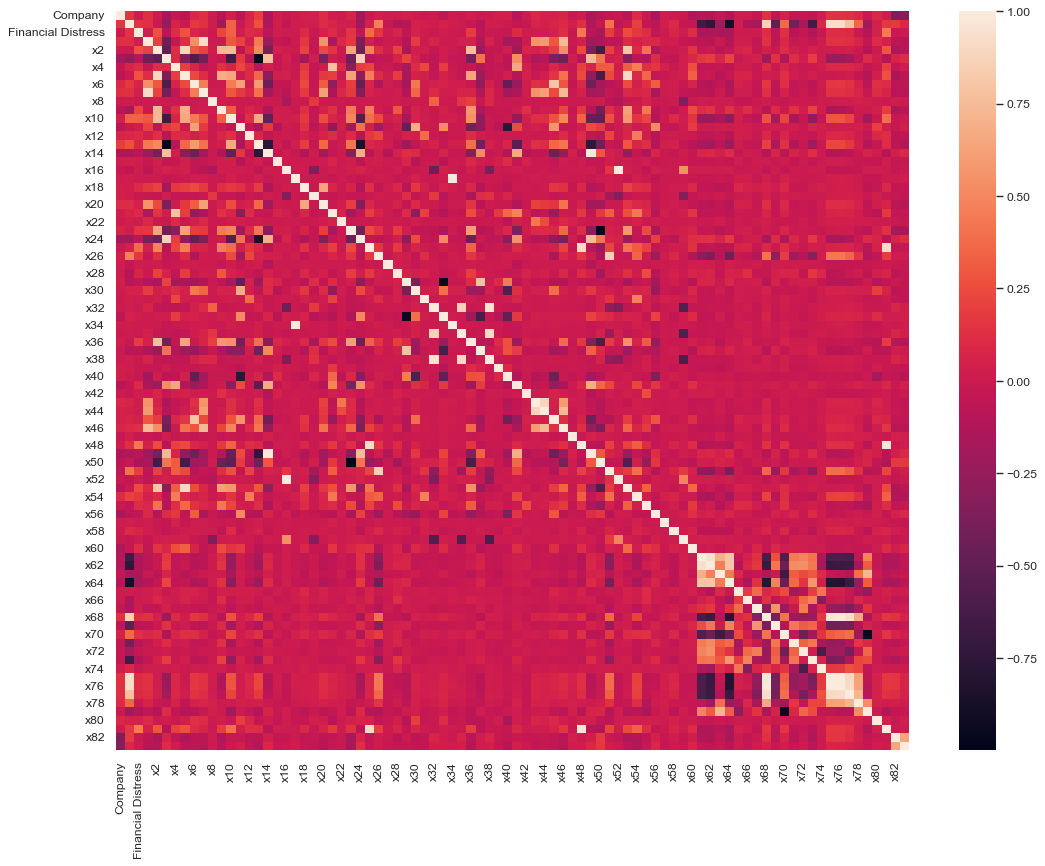

In [ ]:
figure(figsize=(16, 12), dpi=80)
sns.heatmap(df.corr());

In [ ]:
def male_plots(feat):
    
    figure(figsize=(16, 12), dpi=80)
    
    x = df[feat]
    y = df['Financial Distress']
    
    plt.subplot(2, 2, 1)
    plt.scatter(x, y)
    plt.xlabel(feat, size = 12 )
    plt.ylabel('Financial Distress', size = 12 )
    plt.title('Scatterplot')
    
    plt.subplot(2, 2, 2)
    plt.boxplot(x) 
    plt.xlabel(feat, size = 12 )
    plt.title('Boxplot')
    
    plt.subplot(2, 2, 3)
    x.hist()
    plt.xlabel(feat, size = 12 )
    plt.title('Histogram')
    
    plt.subplot(2, 2, 4)
    plt.plot(np.sort(x), np.linspace(0, 1, len(x), endpoint=False))
    plt.xlabel(feat, size = 12 )
    plt.title('ECDF')
    plt.show()

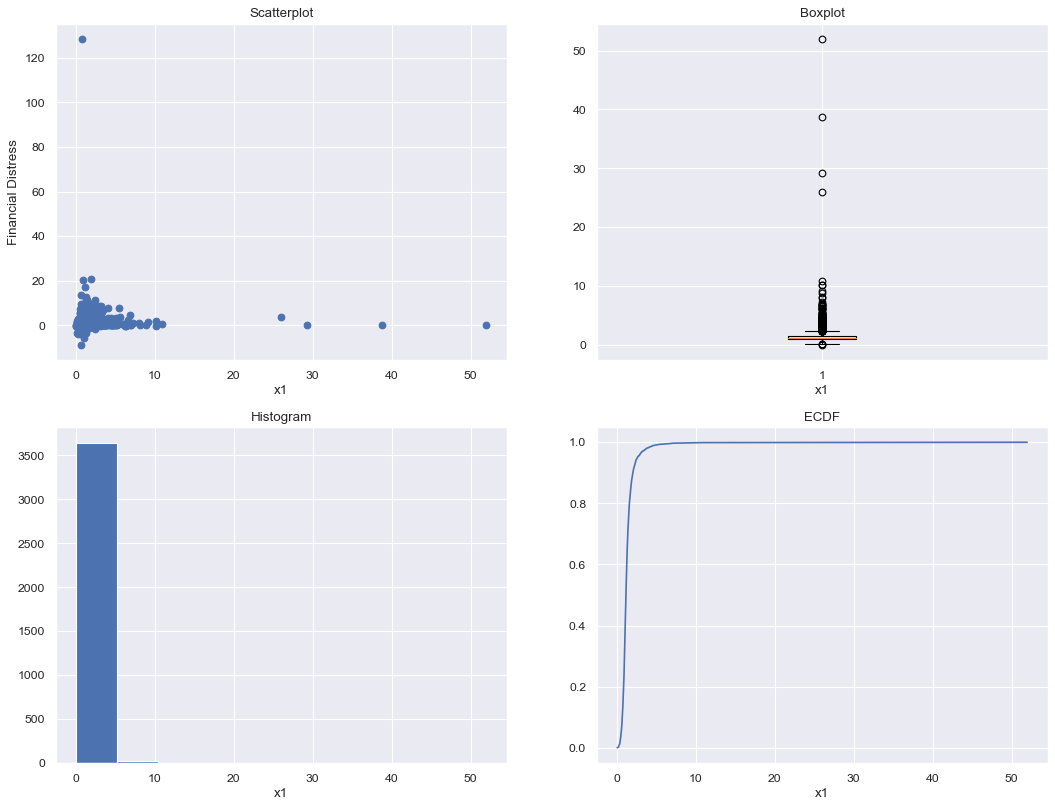

In [ ]:
# функцич для детального анализа признака
male_plots('x1')

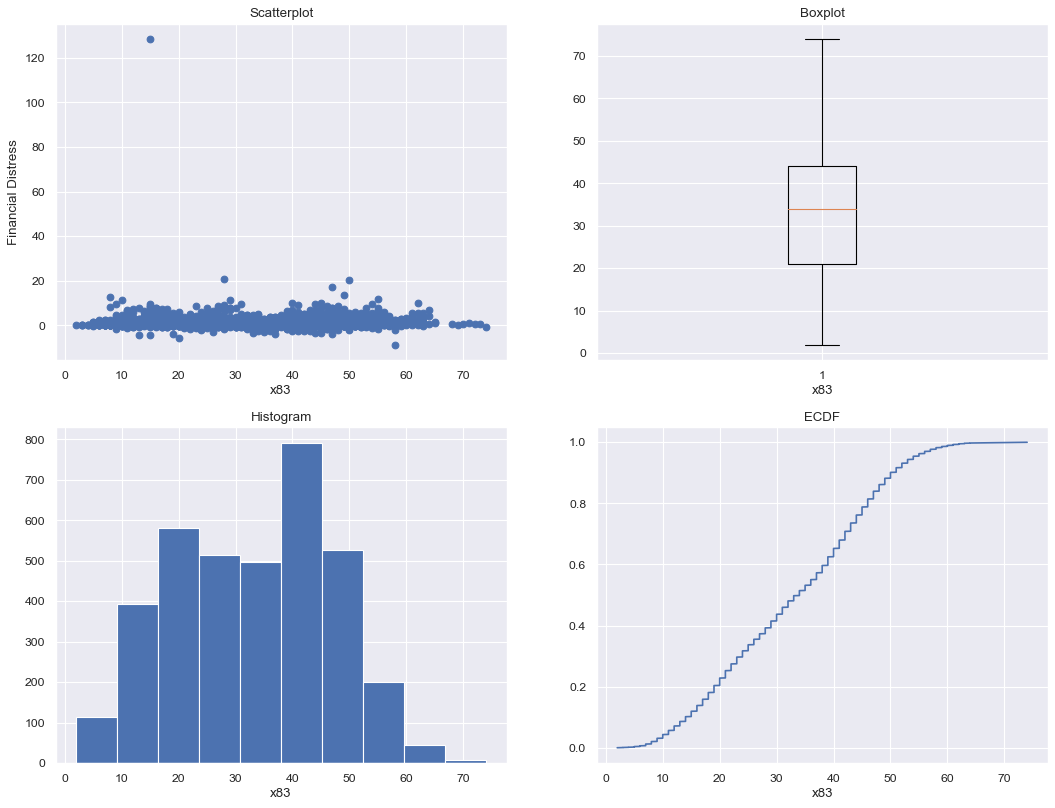

In [ ]:
male_plots('x83')

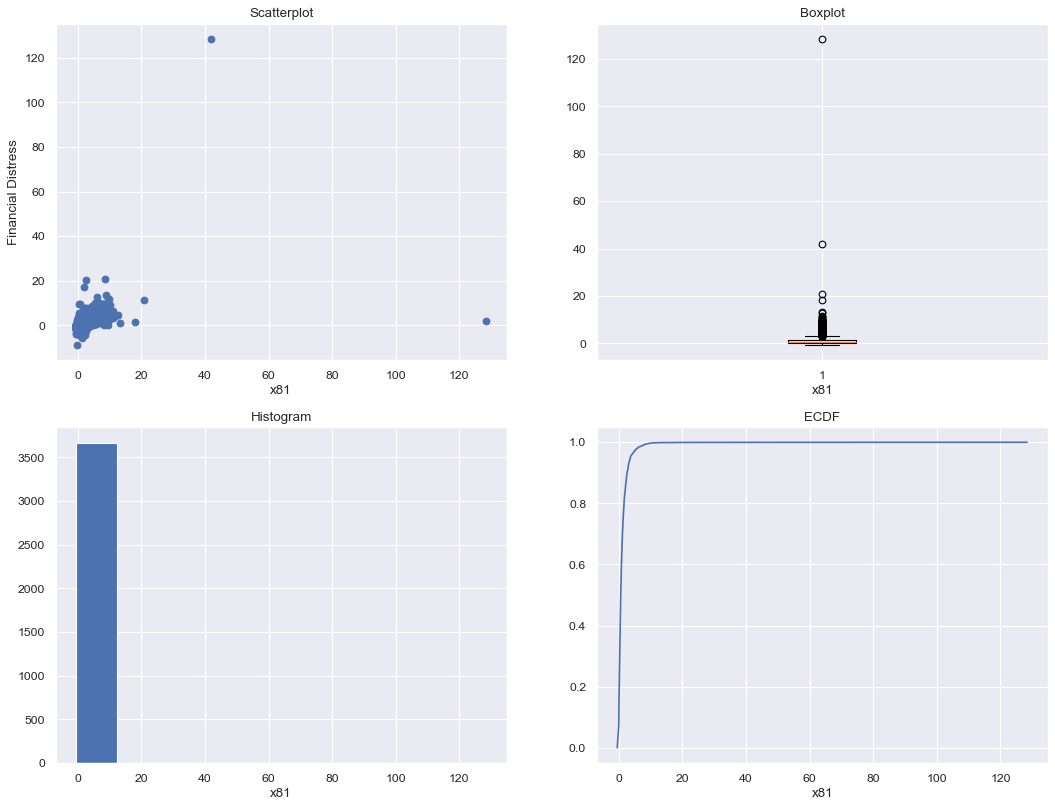

In [ ]:
male_plots('x81')

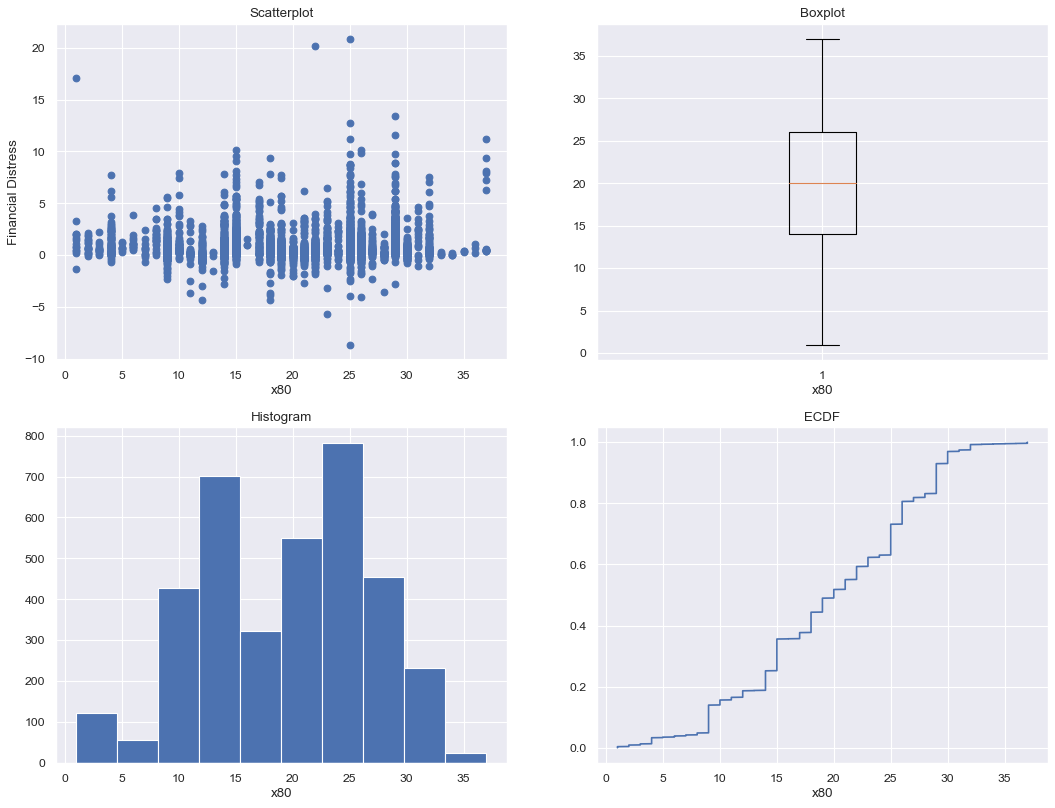

In [ ]:
male_plots('x80')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Company,3672.0,182.084423,1.170246e+02,1.000000e+00,80.000000,168.000000,264.250000,4.220000e+02
Time,3672.0,7.528322,4.064016e+00,1.000000e+00,4.000000,7.000000,11.000000,1.400000e+01
Financial Distress,3672.0,1.040257,2.652227e+00,-8.631700e+00,0.172275,0.583805,1.351750,1.284000e+02
x1,3672.0,1.387820,1.452926e+00,7.517000e-02,0.952145,1.183600,1.506475,5.195400e+01
x2,3672.0,0.129706,1.200130e-01,-2.580800e-01,0.048701,0.107530,0.188685,7.494100e-01
x3,3672.0,0.615769,1.779042e-01,1.613500e-02,0.501888,0.638690,0.749425,9.679000e-01
x4,3672.0,0.868160,5.719519e-01,5.350000e-07,0.552558,0.775245,1.039000,6.835600e+00
x5,3672.0,0.154949,1.249040e-01,-2.697900e-01,0.070001,0.131830,0.219570,8.585400e-01
x6,3672.0,0.106717,2.105546e-01,-6.277500e-01,-0.027754,0.104325,0.231230,9.295500e-01
x7,3672.0,0.784031,1.033606e+00,3.516000e-02,0.436003,0.641875,0.896772,3.883600e+01


#### Task 6

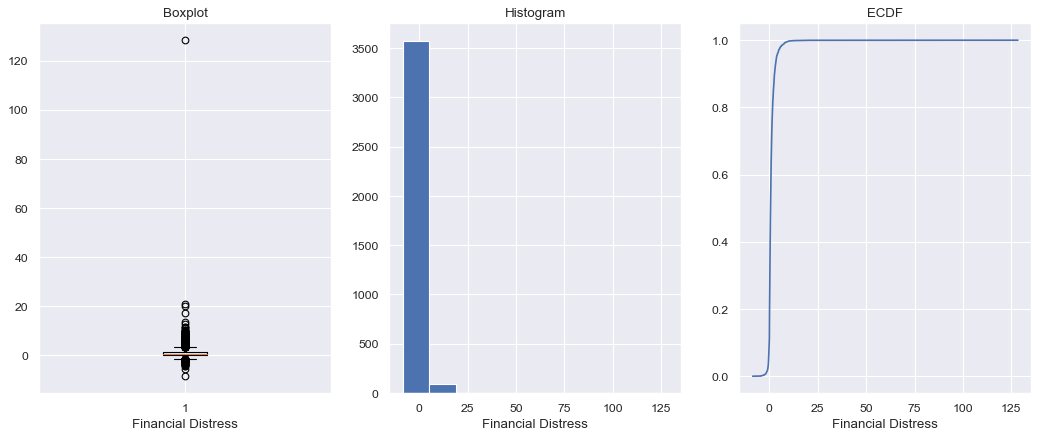

In [ ]:
# из неправдоподобных кажется странным целевой признак

figure(figsize=(16, 6), dpi=80)
y = df['Financial Distress']

plt.subplot(1, 3, 1)
plt.boxplot(y) 
plt.xlabel('Financial Distress', size = 12 )
plt.title('Boxplot')

plt.subplot(1, 3, 2)
y.hist()
plt.xlabel('Financial Distress', size = 12 )
plt.title('Histogram')

plt.subplot(1, 3, 3)
plt.plot(np.sort(y), np.linspace(0, 1, len(y), endpoint=False))
plt.xlabel('Financial Distress', size = 12 )
plt.title('ECDF')
plt.show()

In [ ]:
#Всего значений 
df.shape

(3672, 86)

In [ ]:
# удалим максимальное значение как аномальное
df = df[df['Financial Distress'] < df['Financial Distress'].max()]

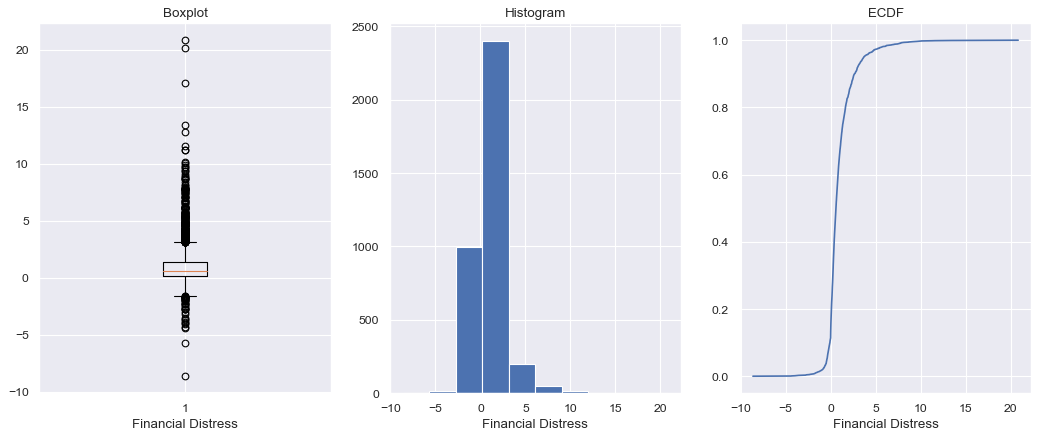

In [ ]:
figure(figsize=(16, 6), dpi=80)
y = df['Financial Distress']

plt.subplot(1, 3, 1)
plt.boxplot(y) 
plt.xlabel('Financial Distress', size = 12 )
plt.title('Boxplot')

plt.subplot(1, 3, 2)
y.hist()
plt.xlabel('Financial Distress', size = 12 )
plt.title('Histogram')

plt.subplot(1, 3, 3)
plt.plot(np.sort(y), np.linspace(0, 1, len(y), endpoint=False))
plt.xlabel('Financial Distress', size = 12 )
plt.title('ECDF')
plt.show()

#### Task 7

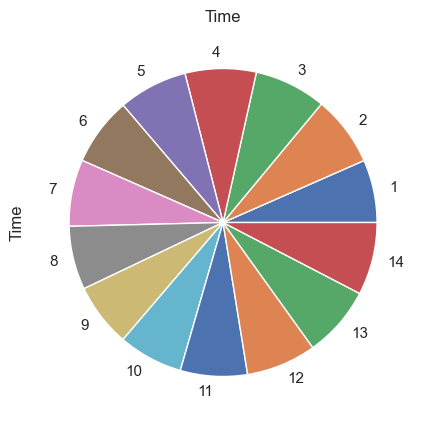

In [ ]:
df_pie = df.groupby('Time').size()

df_pie.plot.pie(figsize=(5, 5), title = 'Time', ylabel = 'Time');

#### Task 8

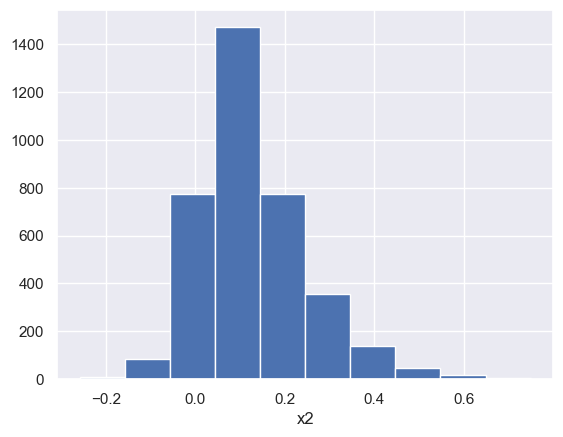

In [ ]:
x = 'x2'

df[x].hist()
plt.xlabel(x, size = 12 )
plt.show()

#### Task 9

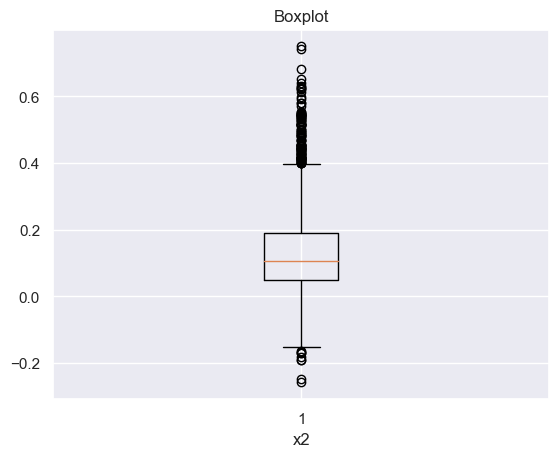

In [ ]:
feat = 'x2'
plt.boxplot(df[feat]) 
plt.xlabel(feat, size = 12 )
plt.title('Boxplot')
plt.show()

In [ ]:
# наблюдаются выбросы

#### Task 10

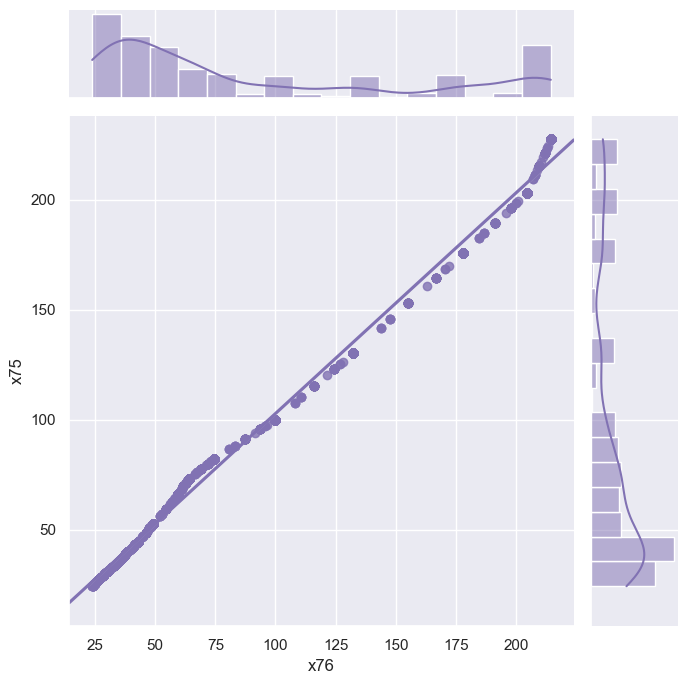

In [ ]:
x1 = 'x76'
x2 = 'x75'


sns.jointplot(x=x1, y=x2, data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)

plt.xlabel(x1)
plt.xlabel(x2)
plt.show()